# Derivace a určitý integrál

TODO:
- vykreslování derivací v print_diff_example
- u richardsona vypisovat i tabulku


In [1]:
import numpy as np
from numericke_metody.derint import *
from numericke_metody.utils.visualizations import multiplot_vals

## Levá, pravá, centrální diference

### Metoda pravé diference (forward difference method)

In [2]:
%psource forward_difference

def forward_difference(f_str, x0, h):
    '''
    Vypočítá derivaci funkce f v bodě x0 pomocí pravé diference
    
    Vstupní parametry
    -----------------
    f_str .... zadaná funkce (string)
    x0 ....... bod v kterém chci derivaci f
    h ........ krok
    
    Výstupní parametry
    ------------------
    Numerická hodnota derivace fce v bodě x0.
    
    '''
    f = str_to_func(f_str)
    return (f(x0+h)-f(x0))/h


### Metoda levé diference (backward difference method)

In [3]:
%psource backward_difference

def backward_difference(f_str, x0, h):
    '''
    Vypočítá derivaci funkce f v bodě x0 pomocí levé diference
    
    Vstupní parametry
    -----------------
    f_str .... zadaná funkce (string)
    x0 ....... bod v kterém chci derivaci f
    h ........ krok
    
    Výstupní parametry
    ------------------
    Numerická hodnota derivace fce v bodě x0.
    
    '''
    f = str_to_func(f_str)
    return (f(x0)-f(x0-h))/h


### Metoda centrální diference (central difference method)

In [4]:
%psource central_difference

def central_difference(f_str, x0, h):
    '''
    Vypočítá derivaci funkce f v bodě x0 pomocí centrální diference
    
    Vstupní parametry
    -----------------
    f_str .... zadaná funkce (string)
    x0 ....... bod v kterém chci derivaci f
    h ........ krok
    
    Výstupní parametry
    ------------------
    Numerická hodnota derivace fce v bodě x0.
    
    '''
    f = str_to_func(f_str)    
    return (f(x0+h)-f(x0-h))/(2*h)


### Příklady

In [2]:
# fce kterou chci derivovat, musí být v proměnné x
fce = 'exp(x)*(1-x)' 
x0 = 1
h = .1

print_diff_example(fce, x0, h)

Skutečná hodnota f'(x):      -2.71828183
Pravá diference:             -3.00416602 (chyba:  -0.28588420)
Levá diference:              -2.45960311 (chyba:   0.25867872)
Centrální diference:         -2.73188457 (chyba:  -0.01360274)


In [3]:
# fce kterou chci derivovat, musí být v proměnné x
fce = 'sin(x)' 

x0 = 1.5
h = .5

print_diff_example(fce, x0, h)

Skutečná hodnota f'(x):       0.07073720
Pravá diference:             -0.17639512 (chyba:  -0.24713232)
Levá diference:               0.31204800 (chyba:   0.24131080)
Centrální diference:          0.06782644 (chyba:  -0.00291076)


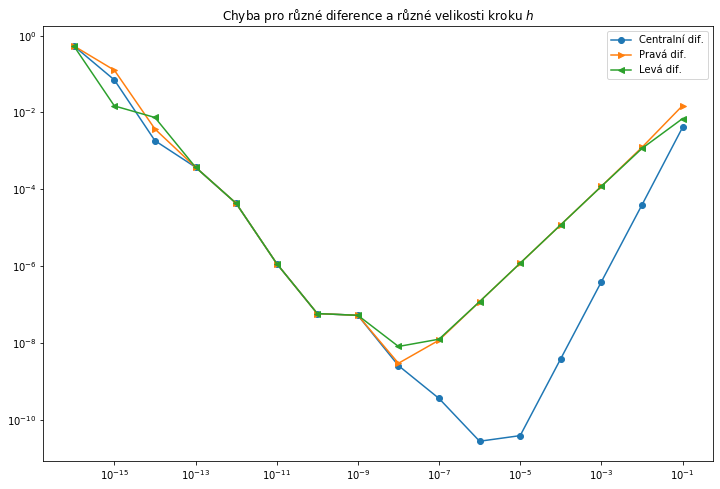

In [2]:
# fce kterou chci derivovat, musí být v proměnné x
fce = 'sin(1/x)' 

# pro jaké velikosti kroku budu derivovat
x0 = 1
hs = [1e-16,1e-15,1e-14,1e-13,1e-12,1e-11,1e-10,1e-09,
     1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1]

plot_diff_err(fce, x0, hs)

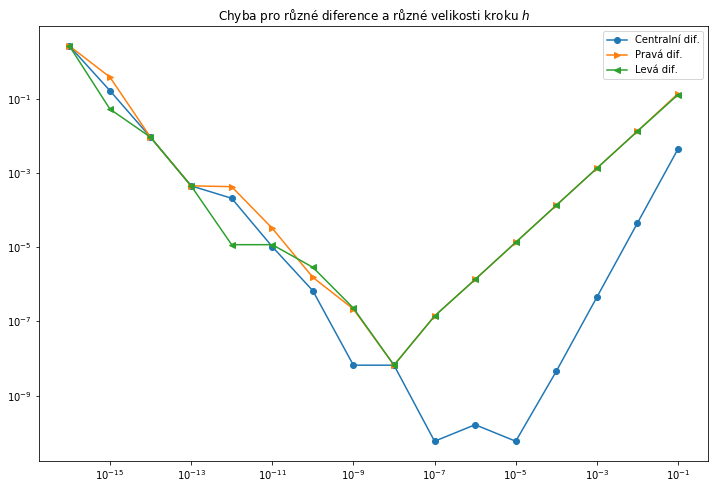

In [3]:
# fce kterou chci derivovat, musí být v proměnné x
fce = 'exp(x)' 

# pro jaké velikosti kroku budu derivovat
x0 = 1
hs = [1e-16,1e-15,1e-14,1e-13,1e-12,1e-11,1e-10,1e-09,
     1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1]

plot_diff_err(fce, x0, hs)

# Druhá centrální diference

In [4]:
%psource second_central_difference

def second_central_difference(f_str, x0, h):
    '''
    Vypočítá druhou derivaci funkce f v bodě x0 pomocí tříbodového vzorce
    
    Vstupní parametry
    -----------------
    f_str .... zadaná funkce (string)
    x0 ....... bod v kterém chci derivaci f
    h ........ krok
    
    Výstupní parametry
    ------------------
    Numerická hodnota druhé derivace fce v bodě x0.
    
    '''
    f = str_to_func(f_str)    
    return (f(x0+h)-2*f(x0)+f(x0-h))/h**2


### Příklady

In [2]:
# fce kterou chci derivovat, musí být v proměnné x
fce = 'sin(x)' 
x0 = 1.5
h = .5

print_diff2central_example(fce, x0, h)

Skutečná hodnota f''(x):       -0.99749499
Druhá centrální diference:     -0.97688625 (chyba:   0.02060874)


## Richardsonova extrapolace

In [2]:
%psource der_richardson

def der_richardson(f_str, x0, h_init, N, method='cd'):
    '''
    Vypočítá derivaci funkce f v bodě x0 pomocí Richardsonovy extrapolace
    
    Vstupní parametry
    -----------------
    f_str .... zadaná funkce (string)
    x0 ....... bod v kterém chci derivaci f
    h_init.... základní krok
    N ........ počet korekcí 
    method ... použitá defierence
            fd ... levá
            bd ... pravá
            cd ... centrální
    
    Výstupní parametry (slovník)
    ----------------------------
    result keys
        f_der ........ Numerická hodnota derivace fce v bodě x0.
        f_der_vals ... hodnoty použité metody a všech korekcí 
    '''
    
    hs = [h_init/(2**i) for i in range(N+1)]
    D = []
    if method == 'cd':
        D.append([central_difference(f_str,x0,h) for h in hs])
        m = 2
    elif method == 'fd': 
        D.append([forward_difference(f_str,x0,h) for h in hs])
        m = 1
    elif method == 'bd': 
        D.append([backward_difference(f_str,x0,h

In [3]:
# fce kterou chci derivovat, musí být v proměnné x
fce = 'log(x)'
x0 = 3
h = 0.8
N = 3
method = 'cd'

print_diff_richardson_example(fce, x0, h, N, method)

Skutečná hodnota f'(x):                     0.33333333
Derivace s Richardsonovou extrapolací:      0.33333333 (chyba: -0.00000000)


In [4]:
# fce kterou chci derivovat, musí být v proměnné x
fce = 'log(x)'
x0 = 3
h = 0.8
N = 3
method = 'fd'

print_diff_richardson_example(fce, x0, h, N, method)

Skutečná hodnota f'(x):                     0.33333333
Derivace s Richardsonovou extrapolací:      0.33332975 (chyba: -0.00000358)


In [5]:
# fce kterou chci derivovat, musí být v proměnné x
fce = 'log(x)'
x0 = 3
h = 0.8
N = 3
method = 'bd'

print_diff_richardson_example(fce, x0, h, N, method)

Skutečná hodnota f'(x):                     0.33333333
Derivace s Richardsonovou extrapolací:      0.33332500 (chyba: -0.00000834)


# Určitý integrál

### Obdélníkové pravidlo

In [3]:
%psource rectangle_integrate

def rectangle_integrate(f_str, a, b, N):
    '''
    Vypočítá určitý integrál funkce pomocí obdélníkového pravidla.
    
    Vstupní parametry
    -----------------
    f_str .... zadaná funkce (string)
    a ........ dolní mez
    b ........ horní mez
    N ........ počet intervalů dělení
    
    Výstupní parametry
    ------------------
    Numerická hodnota určitého integrálu fce od a do b
    
    '''
    f = str_to_func(f_str)
    h = (b - a) / N
    result = 0
    
    for i in range(N):
        x = a + (i + .5) * h
        result += f(x) * h
    
    return result


### Lichoběžníkové pravidlo

In [4]:
%psource trapezoid_integrate

def trapezoid_integrate(f_str, a, b, N):
    '''
    Vypočítá určitý integrál funkce pomocí lichoběžníkového pravidla.
    
    Vstupní parametry
    -----------------
    f_str .... zadaná funkce (string)
    a ........ dolní mez
    b ........ horní mez
    N ........ počet intervalů dělení
    
    Výstupní parametry
    ------------------
    Numerická hodnota určitého integrálu fce od a do b
    
    '''    
    f = str_to_func(f_str)
    h = (b - a) / N
    result = 0
    
    for i in range(N):
          xl = a + i * h
          xr = a + (i+1) * h
          result += (f(xl)+f(xr)) * h/2

    return result


### Simpsonovo pravidlo

In [5]:
%psource simpson_integrate

def simpson_integrate(f_str, a, b, N):
    '''
    Vypočítá určitý integrál funkce pomocí Simpsonova pravidla.
    
    Vstupní parametry
    -----------------
    f_str .... zadaná funkce (string)
    a ........ dolní mez
    b ........ horní mez
    N ........ počet intervalů dělení
    
    Výstupní parametry
    ------------------
    Numerická hodnota určitého integrálu fce od a do b
    
    '''    
    f = str_to_func(f_str)
    
    if N % 2:
      N += 1
    
    h = (b - a) / N
    result = 0
    
    for i in range(int(N/2)):
          xl = a + 2*i * h
          xc = a + (2*i+1) * h            
          xr = a + 2*(i+1) * h
          result += (f(xr)+4*f(xc)+f(xl)) * h/3
    
    return result


### Příklady 

In [2]:
# fce kterou chci integrovat, musí být v proměnné x
fce = 'exp(x)' 
a = 1
b = 1.2
N = 2

print_int_example(fce, a, b, N)

Skutečná hodnota integrálu:       0.60183509
Obdélníkové pravidlo:             0.60158440 (chyba: -0.00025069)
Lichoběžníkové pravidlo:          0.60233654 (chyba:  0.00050145)
Simpsonovo pravidlo:              0.60183543 (chyba:  0.00000033)


In [11]:
# fce kterou chci integrovat, musí být v proměnné x
fce = 'sin(x)' 
a = 0
b = np.pi
N = 2

print_int_example(fce, a, b, N)

Skutečná hodnota integrálu:       2.00000000
Obdélníkové pravidlo:             2.22144147 (chyba:  0.22144147)
Lichoběžníkové pravidlo:          1.57079633 (chyba: -0.42920367)
Simpsonovo pravidlo:              2.09439510 (chyba:  0.09439510)


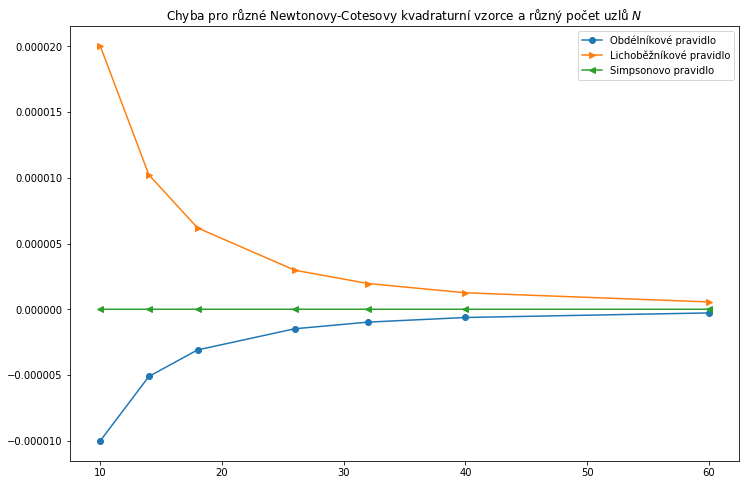

In [2]:
# fce kterou chci integrovat, musí být v proměnné x
fce = 'exp(x)' 
a = 1
b = 1.2
Ns = [10,14,18,26,32,40,60]

plot_int_err(fce, a, b , Ns)

### Richardsonova extrapolace

In [3]:
%psource richardson_integrate

def richardson_integrate(f_str, a, b, N, cor_num = 3, method = 'rt'):
    '''
    Vypočítá určitý integrál funkce pomocí Richardsonovy extrapolace
    
    Vstupní parametry
    -----------------
    f_str .... zadaná funkce (string)
    a ........ dolní mez
    b ........ horní mez
    N ........ počet intervalů dělení
    cor_num .. počet korekcí 
    method ... použité pravidlo
            rt ... obdélníkové pravidlo
            tr ... lichoběžníkové pravidlo
            sm ... simpsonovo pravidlo
    
    Výstupní parametry (slovník)
    ----------------------------
    result keys
        f_int ........ numerická hodnota integrálu fce
        f_int_vals ... hodnoty použité metody a všech korekcí 
    '''
    I = []
    if method == 'rt':
        I.append([rectangle_integrate(f_str, a, b, N*(2**i)) for i in range(cor_num+1)])
        m = 2
    elif method == 'tr': 
        I.append([trapezoid_integrate(f_str, a, b, N*(2**i)) for i in range(cor_num+1)])
        m = 2
    elif method

In [2]:
# fce kterou chci integrovat, musí být v proměnné x
fce = 'log(x)'
a = 1
b = 5
N = 2
method = 'tr'
cor_num = 2

print_int_richardson_example(fce, a, b, N, method, cor_num)

Skutečná hodnota integrálu f na [a,b]:      4.04718956
Integrál s Richardsonovou extrapolací:      4.04700032 (chyba:  -0.00018924)


In [3]:
# fce kterou chci integrovat, musí být v proměnné x
fce = 'log(x)'
a = 1
b = 5
N = 2
method = 'rt'
cor_num = 2

print_int_richardson_example(fce, a, b, N, method, cor_num)

Skutečná hodnota integrálu f na [a,b]:      4.04718956
Integrál s Richardsonovou extrapolací:      4.04736524 (chyba:   0.00017568)


In [4]:
# fce kterou chci integrovat, musí být v proměnné x
fce = 'log(x)'
a = 1
b = 5
N = 2
method = 'sm'
cor_num = 2

print_int_richardson_example(fce, a, b, N, method, cor_num)

Skutečná hodnota integrálu f na [a,b]:      4.04718956
Integrál s Richardsonovou extrapolací:      4.04701182 (chyba:  -0.00017774)


In [5]:
# fce kterou chci integrovat, musí být v proměnné x
fce = 'sin(x)'
a = 0
b = np.pi
N = 4
method = 'rt'
cor_num = 3

print_int_richardson_example(fce, a, b, N, method, cor_num)

Skutečná hodnota integrálu f na [a,b]:      2.00000000
Integrál s Richardsonovou extrapolací:      2.00000000 (chyba:  -0.00000000)
